In [81]:
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label


# Método del Punto Fijo
Sea la ecuación:

$$\begin{equation}f(x)=0\end{equation} \label{eqn:fx}$$

de la cual se desea encontrar la raiz real $\bar{x}$.


**Paso 1:** Hay que transformar la ecuación \ref{eqn:fx} a la forma equivalente:

$$\begin{equation}x=g(x)\end{equation}\label{eq:xigualg}$$

**Paso 2:** Una vez obtenida la forma equivalente (Ec. \ref{eq:xigualg}), se tantea una raíz $(x_0)$ 

**Paso 3:** Se evalúa la forma equivalente (Ec. \ref{eq:xigualg}) en $x_0$ y se obtiene $x_1$:

$$\begin{equation}
g(x_0)=x_1 \label{eqn:x1}
\end{equation}$$

**Paso 4:** Comparar el valor de $x_1$ con el $x_0$

> **Caso 1. $x_1=x_0$**
>> El problema queda concluido. Se ha elegido como valor inicial $(x_0)$ una raíz, es decir, que al evaluar la ecuación \ref{eqn:fx} en $x_0$, se tiene que $f(x_0)=0$.

> **Caso 2. $x_1\not=x_0 $**
>> Se procede a evaluar nuevamente la ecuación \ref{eq:xigualg}, pero ahora en $x_1$, con lo cual se obtiene $x_2$:

$$\begin{equation} 
x_2=g(x_1)
\end{equation}$$

>> El proceso se repite n veces, o bien, hasta que $d=\lvert x_n-x_{n-1}\rvert \leq \epsilon$ o $\lvert f(x_i) \rvert \leq \epsilon$. Lo que suceda primero.

>> _Por otro lado, para determinar si la sucesión $x_0, x_1, x_2,\ldots,x_n$ está convergiendo o divergiendo de $\bar{x}$, se puede calcular la sucesión $f(x_0), f(x_1), f(x_2),\ldots, f(x_n)$. Si la sucesión tiende a cero, el algoritmo está convergiendo a $\bar{x}$, de ser el caso contrario, se dice que el algoritmo está  divergiendo de $\bar{x}$._



## Sea $f(x)=2\,x^2\,-\,x\,-\,5\,=\,0$

Algunas posibilidades de $x=g(x)$ son:
> **a)** $x=2\,x^2\,-\,5$ 

> **b)** $x=\sqrt{\frac{x+5}{2}}$

> **c)** $x=\dfrac{5}{2x-1}$


In [56]:
def fx(x):
    return 2*x**2-x-5

def gxa(x):
    return 2*x**2-5

def gxb(x):
    return np.sqrt((x+5.0)/2.0)

def gxc(x):
    return x/(2*x+1)

In [57]:
x=np.linspace(0,10)

### Caso $x=2*x^2-5$

In [58]:
x0=2.0
x1=gxa(x0)
x2=gxa(x1)
x3=gxa(x2)

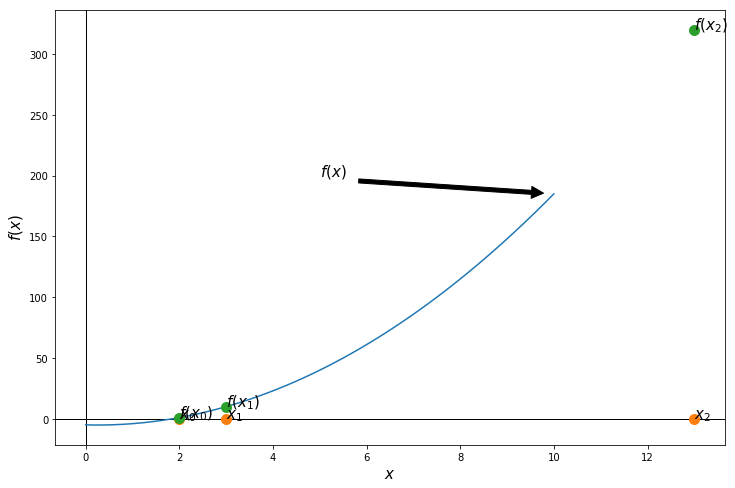

In [59]:
plt.figure(figsize=(12,8))
plt.axhline(linewidth=1, color='k')
plt.axvline(linewidth=1, color='k')

plt.plot(x,fx(x))

plt.plot([x0,x1,x2], [0,0,0], 'o',markersize=10)
plt.plot([x0,x1,x2], [fx(x0),fx(x1),fx(x2)], 'o',markersize=10)

plt.annotate(r'$f(x)$', xy=(10,fx(10)), xytext=(5,200),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)

plt.text(x0,0, r'$x_0$',fontsize=15)
plt.text(x1,0, r'$x_1$',fontsize=15)
plt.text(x2,0, r'$x_2$',fontsize=15)

plt.text(x0,fx(x0), r'$f(x_0)$',fontsize=15)
plt.text(x1,fx(x1), r'$f(x_1)$',fontsize=15)
plt.text(x2,fx(x2), r'$f(x_2)$',fontsize=15)


plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$f(x)$",fontsize=15)
plt.show()

### Caso $x=\sqrt{\dfrac{x+5}{2}}$

In [60]:
x0=2.0
x1=gxb(x0)
x2=gxb(x1)
x3=gxb(x2)

x=np.linspace(1.5,2.5,10)

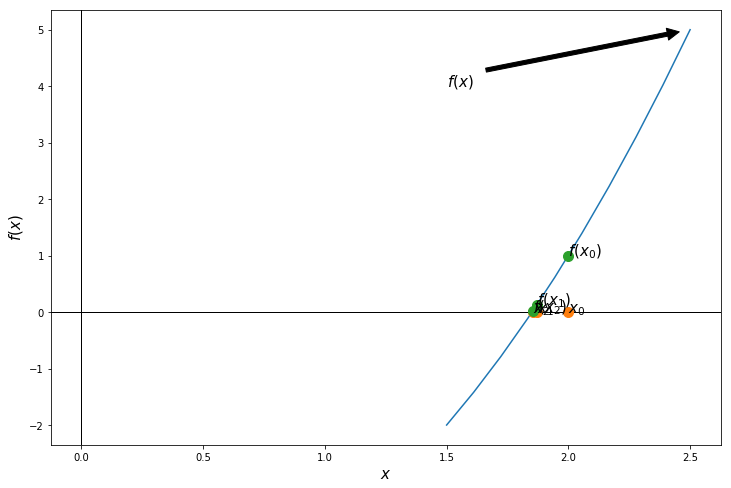

In [61]:
plt.figure(figsize=(12,8))
plt.axhline(linewidth=1, color='k')
plt.axvline(linewidth=1, color='k')


plt.plot(x,fx(x))

plt.plot([x0,x1,x2], [0,0,0], 'o',markersize=10)
plt.plot([x0,x1,x2], [fx(x0),fx(x1),fx(x2)], 'o',markersize=10)

plt.annotate(r'$f(x)$', xy=(2.5,fx(2.5)), xytext=(1.5,4),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)

plt.text(x0,0, r'$x_0$',fontsize=15)
plt.text(x1,0, r'$x_1$',fontsize=15)
plt.text(x2,0, r'$x_2$',fontsize=15)

plt.text(x0,fx(x0), r'$f(x_0)$',fontsize=15)
plt.text(x1,fx(x1), r'$f(x_1)$',fontsize=15)
plt.text(x2,fx(x2), r'$f(x_2)$',fontsize=15)


plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$f(x)$",fontsize=15)
plt.show()

In [87]:
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="linear", y_range=[-2, 5], title="caso inciso b",
   x_axis_label=r'$x$', y_axis_label=r'$f(x)$'
)

source = ColumnDataSource(data=dict(x=[x0,x1,x2,x3],
                                    y=[0,0,0,0],
                                    names=['x0', 'x1', 'x2', 'x3']))

p.line(x, fx(x), legend="f(x)")
p.scatter(x="x", y="y", size=8, source=source)
labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')


p.circle([x0,x1,x2,x3], [fx(x0),fx(x1),fx(x2),fx(x3)],size=10, color="black", alpha=0.5)

p.add_layout(labels)

show(p)